In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns



In [38]:
# importer dataset & visualisation basique
path = "data/Speed+Dating+Data.csv"
df = pd.read_csv(path,encoding="ISO-8859-1")
df.info

<bound method DataFrame.info of       iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1.0       0    1       1     1     10         7       NaN      4   
1       1   1.0       0    1       1     1     10         7       NaN      3   
2       1   1.0       0    1       1     1     10         7       NaN     10   
3       1   1.0       0    1       1     1     10         7       NaN      5   
4       1   1.0       0    1       1     1     10         7       NaN      7   
...   ...   ...     ...  ...     ...   ...    ...       ...       ...    ...   
8373  552  22.0       1   44       2    21     22        14      10.0      5   
8374  552  22.0       1   44       2    21     22        13      10.0      4   
8375  552  22.0       1   44       2    21     22        19      10.0     10   
8376  552  22.0       1   44       2    21     22         3      10.0     16   
8377  552   NaN       1   44       2    21     22         2      10.0     15   

      .

# Sommaire
    ➡️ % de match selon le genre
    ➡️ Volonté du partenaire de se revoir
        ➡️ Impact de l'attractivité
        ➡️ Impact de la sincérité
        ➡️ Impact du charisme / amusement
    ➡️ Attente Vs Réalité
        ➡️ Correllation Attente Vs Realité
        ➡️ Correllation des critère de décision
        ➡️ Correllation Attente Vs Realité (notes, genre)
    ➡️ Traits désirables
        ➡️ Loisirs par genres
    ➡️ Ordre d'arrivé dans un Date
    ➡️ Autoperception Vs Realité
    ➡️ Maintiens dans le temps

## Introduction
L’objectif de cette analyse est de comprendre quels facteurs influencent la décision de se revoir après un speed date. 
Nous allons explorer les critères déterminants, comparer les attentes et la réalité, et voir si les matchs tiennent dans le temps.


## % de match

In [39]:
# df[df["gender"] == 1]
# df[(df["gender"] == 1) & (df["match"] == 1)]
# len(df[(df["gender"] == 1) & (df["match"] == 1)]) / len(df[df["gender"] == 1])
print("men match: ", len(df[(df["gender"] == 1) & (df["match"] == 1)]) / len(df[df["gender"] == 1]) * 100, "%, women match: ",len(df[(df["gender"] == 0) & (df["match"] == 1)]) / len(df[df["gender"] == 0]) * 100, "%")

men match:  16.452074391988557 %, women match:  16.491395793499045 %


➡️ Le pourcentage de match Femme Homme est équivalent

## 👓 volonter du partenaire de se revoir

In [40]:
# len(df[(df["gender"] == 1) & (df["dec_o"] == 1)])
print("men dec_o: ", len(df[(df["gender"] == 1) & (df["dec_o"] == 1)]) / len(df[df["gender"] == 1]) * 100, "%, women dec_o: ",len(df[(df["gender"] == 0) & (df["dec_o"] == 1)]) / len(df[df["gender"] == 0]) * 100, "%")

men dec_o:  36.456843109203625 %, women dec_o:  47.46653919694073 %


➡️ Les Femmes sont plus motivées à revoir le partenaire 47.46% Vs 36.45%

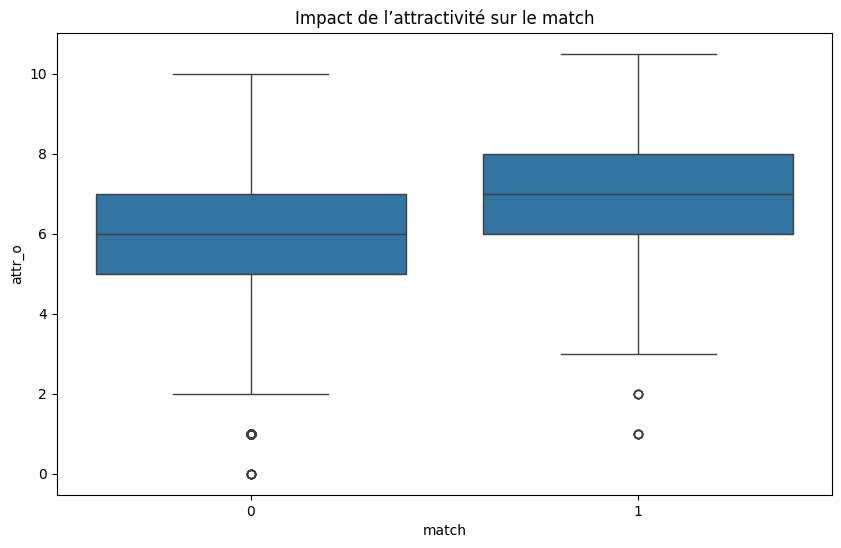

In [41]:
attributes = ["attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o"]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="match", y="attr_o")
plt.title("Impact de l’attractivité sur le match")
plt.show()


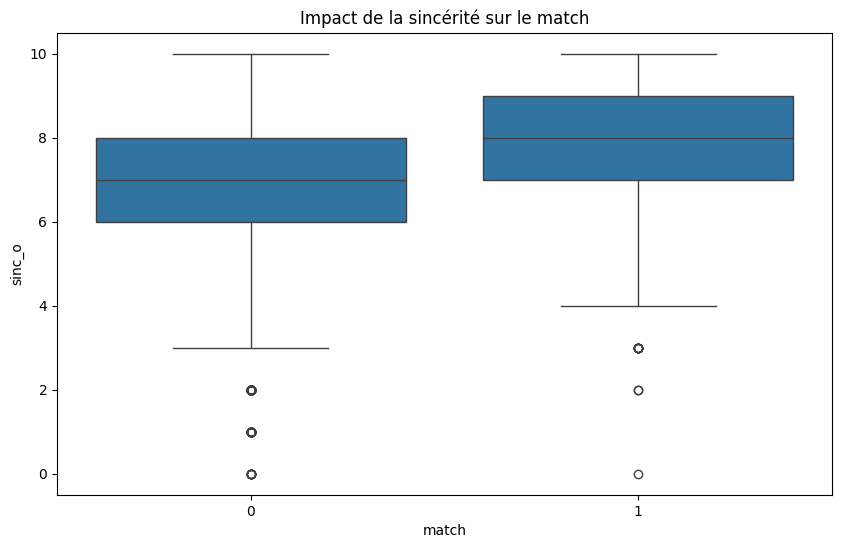

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="match", y="sinc_o")
plt.title("Impact de la sincérité sur le match")
plt.show()


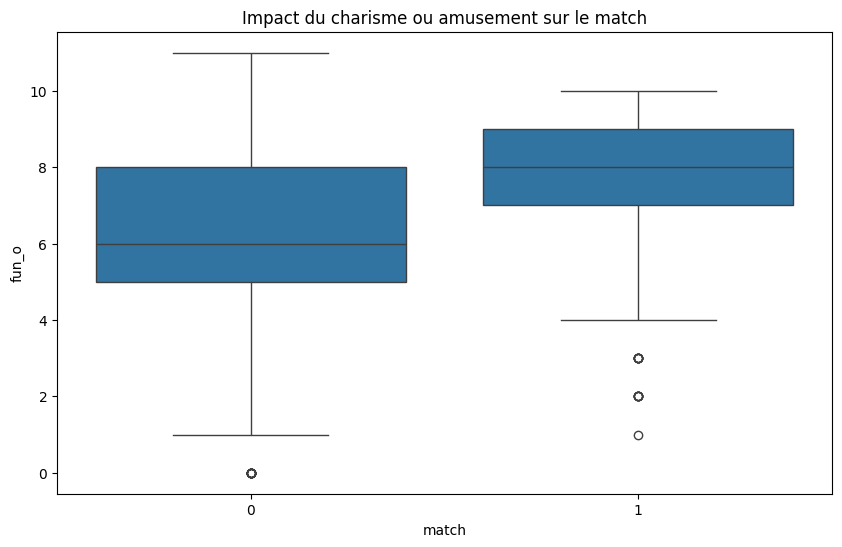

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="match", y="fun_o")
plt.title("Impact du charisme ou amusement sur le match")
plt.show()


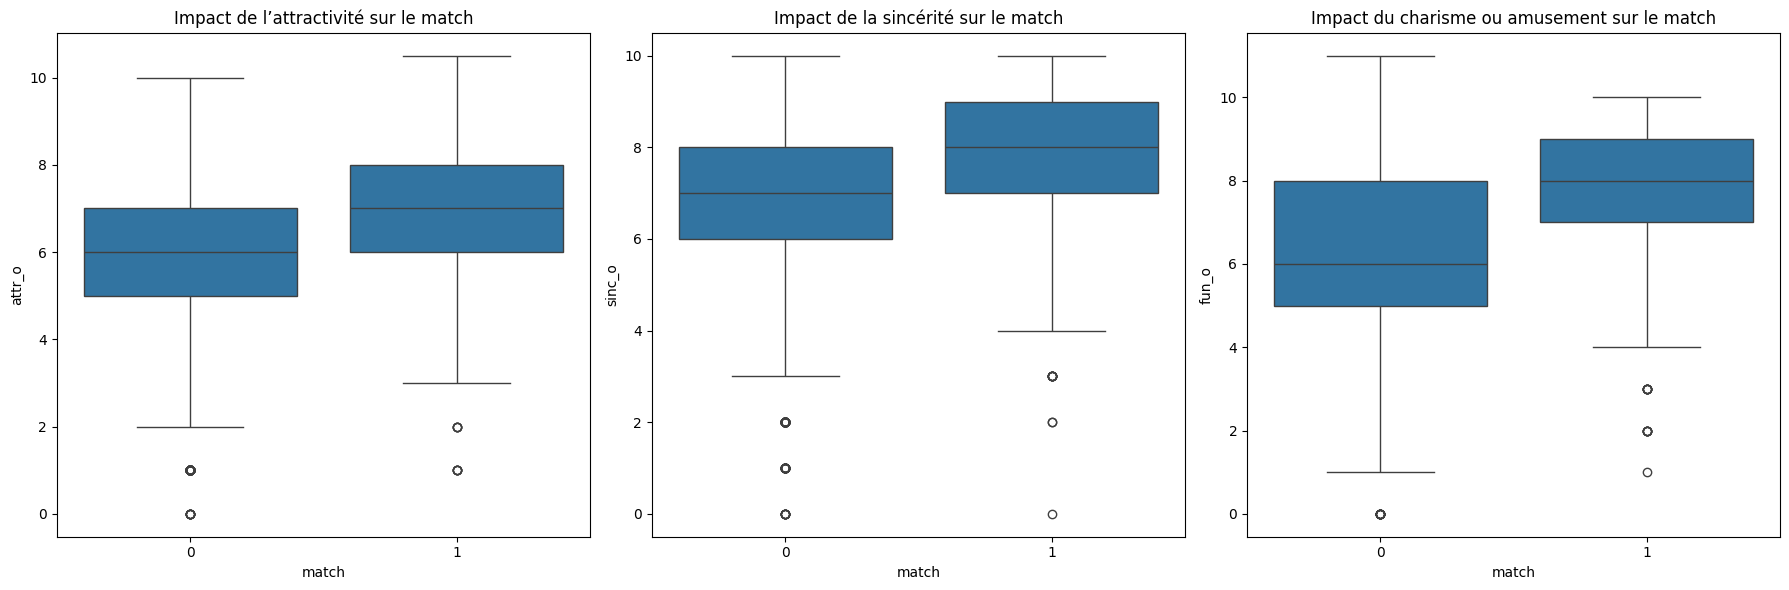

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir la taille de la figure et le nombre de subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Liste des attributs et titres correspondants
attributes = ["attr_o", "sinc_o", "fun_o"]
titles = [
    "Impact de l’attractivité sur le match",
    "Impact de la sincérité sur le match",
    "Impact du charisme ou amusement sur le match"
]

# Boucle pour tracer chaque boxplot
for i, (attr, title) in enumerate(zip(attributes, titles)):
    sns.boxplot(data=df, x="match", y=attr, ax=axes[i])
    axes[i].set_title(title)

# Ajuster l'affichage
plt.tight_layout()
plt.show()


➡️ Les traits etudiés sont plus important globalement pour les Femmes, cependant la dispersion chez les Hommes rends l'affirmation difficile à conclure

## Attente Vs Realité

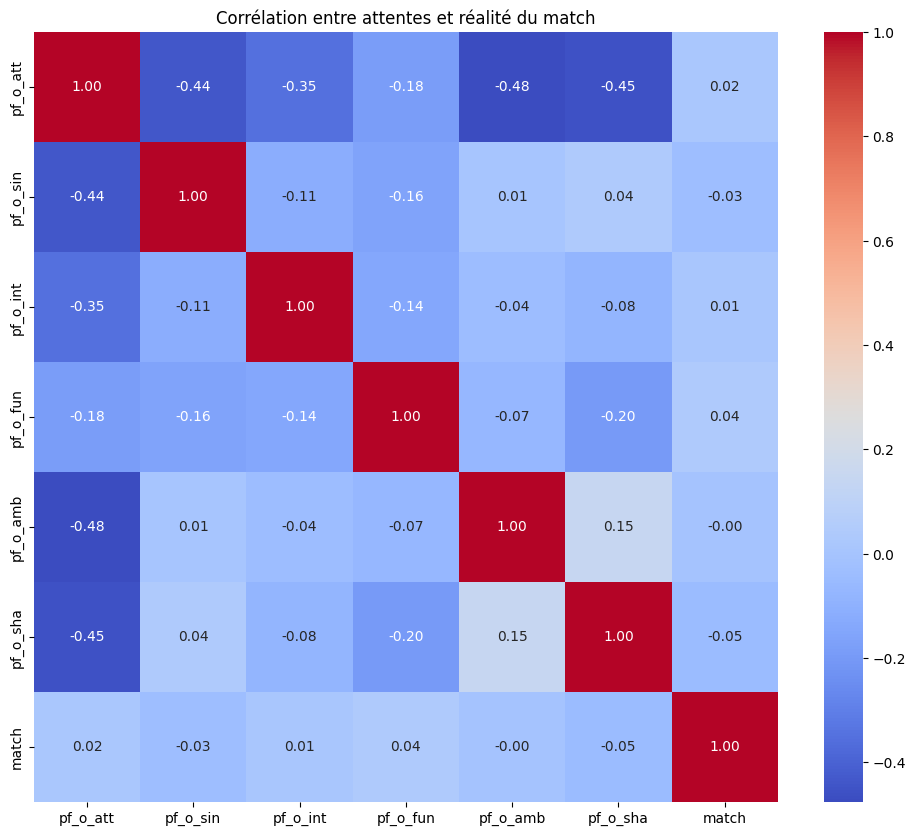

In [46]:
cols = ["pf_o_att", "pf_o_sin", "pf_o_int", "pf_o_fun", "pf_o_amb", "pf_o_sha", "match"]
correlation = df[cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre attentes et réalité du match")
plt.show()


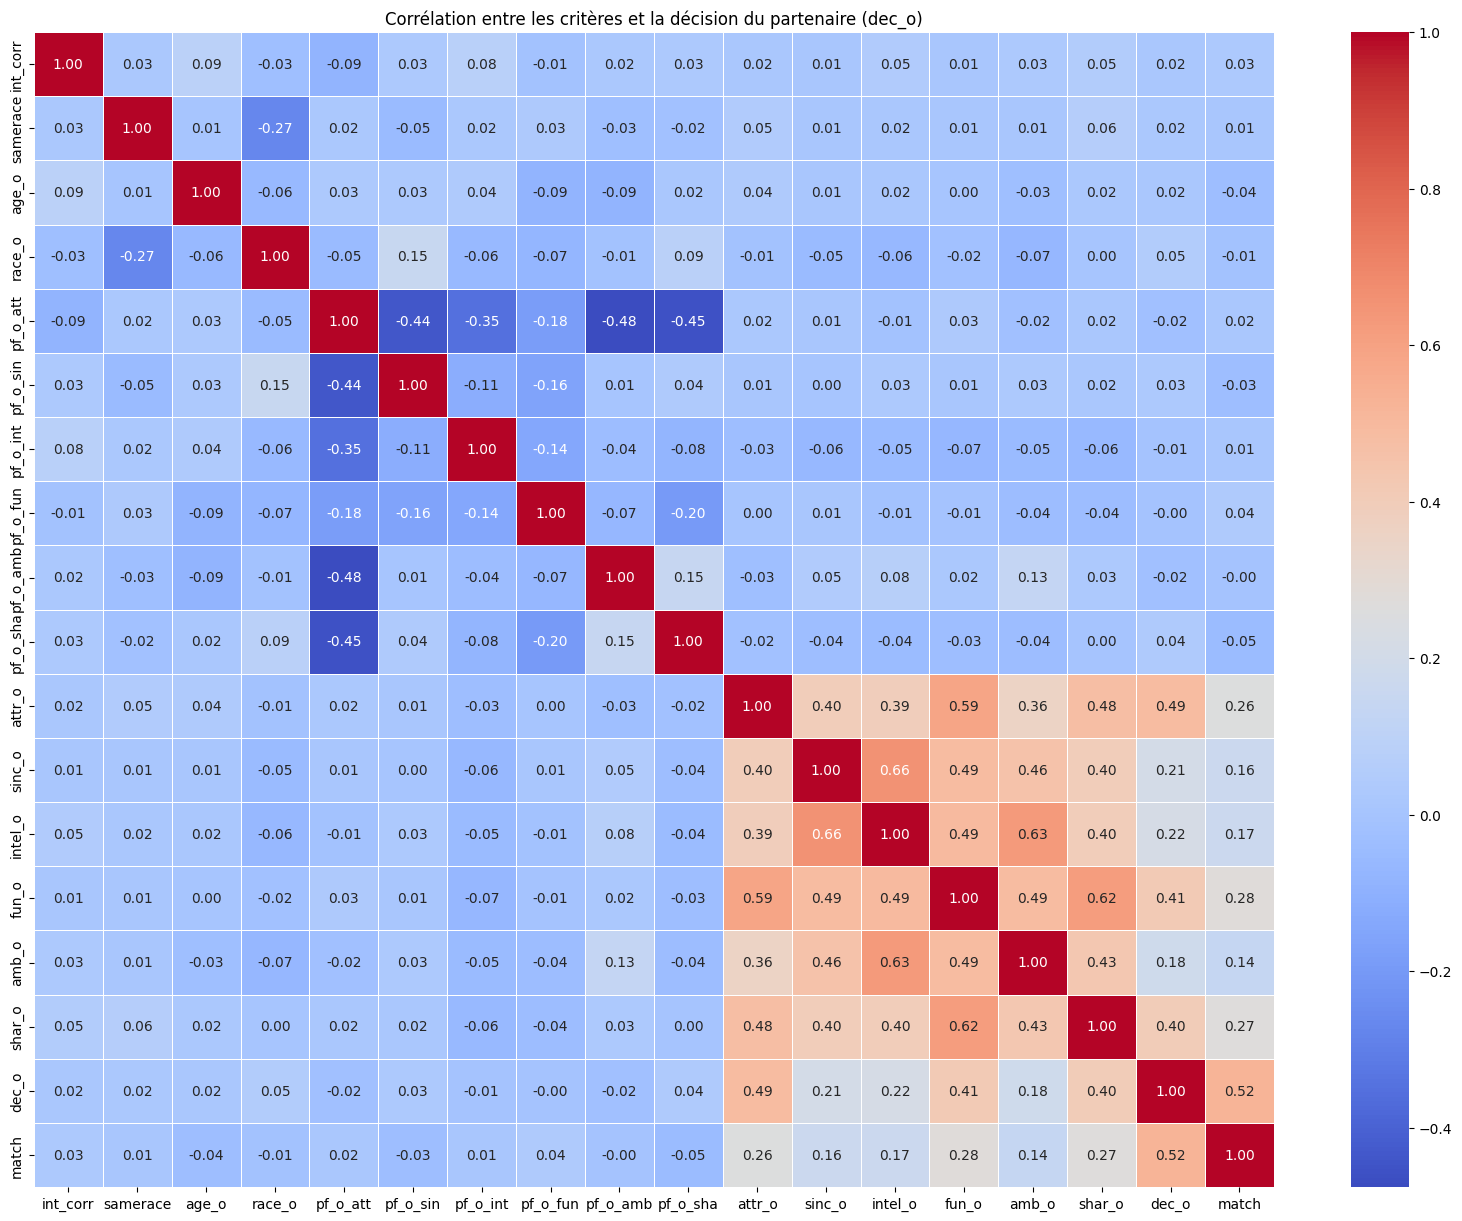

In [47]:
# Sélection des variables influençant directement `dec_o`
cols_decision = ["int_corr", "samerace", "age_o", "race_o", 
                 "pf_o_att", "pf_o_sin", "pf_o_int", "pf_o_fun", "pf_o_amb", "pf_o_sha", 
                 "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", 
                 "dec_o", "match"]

# Calcul de la corrélation
correlation_decision = df[cols_decision].corr()

# Création de la heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_decision, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre les critères et la décision du partenaire (dec_o)")
plt.show()


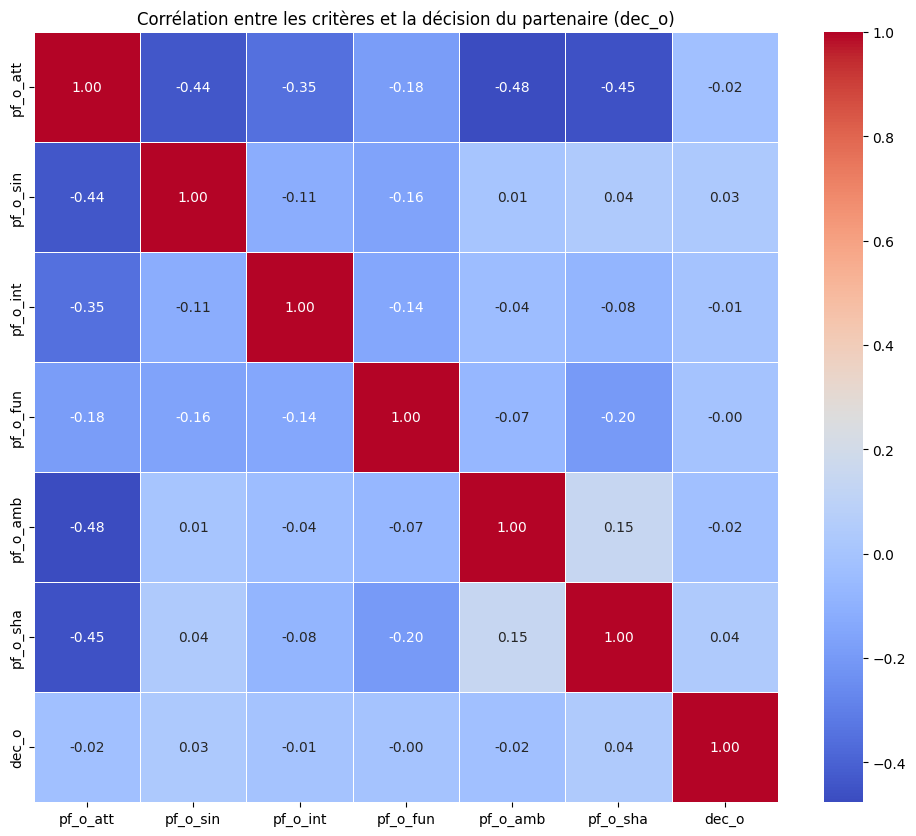

In [48]:

# # Sélection des variables influençant directement `dec_o`
# cols_decision = ["int_corr", "samerace", "age_o", "race_o", 
#                  "pf_o_att", "pf_o_sin", "pf_o_int", "pf_o_fun", "pf_o_amb", "pf_o_sha", 
#                  "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", 
#                  "dec_o", "match"]

# Sélection des variables influençant directement `dec_o`
cols_decision = ["pf_o_att", "pf_o_sin", "pf_o_int", "pf_o_fun", "pf_o_amb", "pf_o_sha", 
                 "dec_o"]

# Calcul de la corrélation
correlation_decision = df[cols_decision].corr()

# Création de la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_decision, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre les critères et la décision du partenaire (dec_o)")
plt.show()


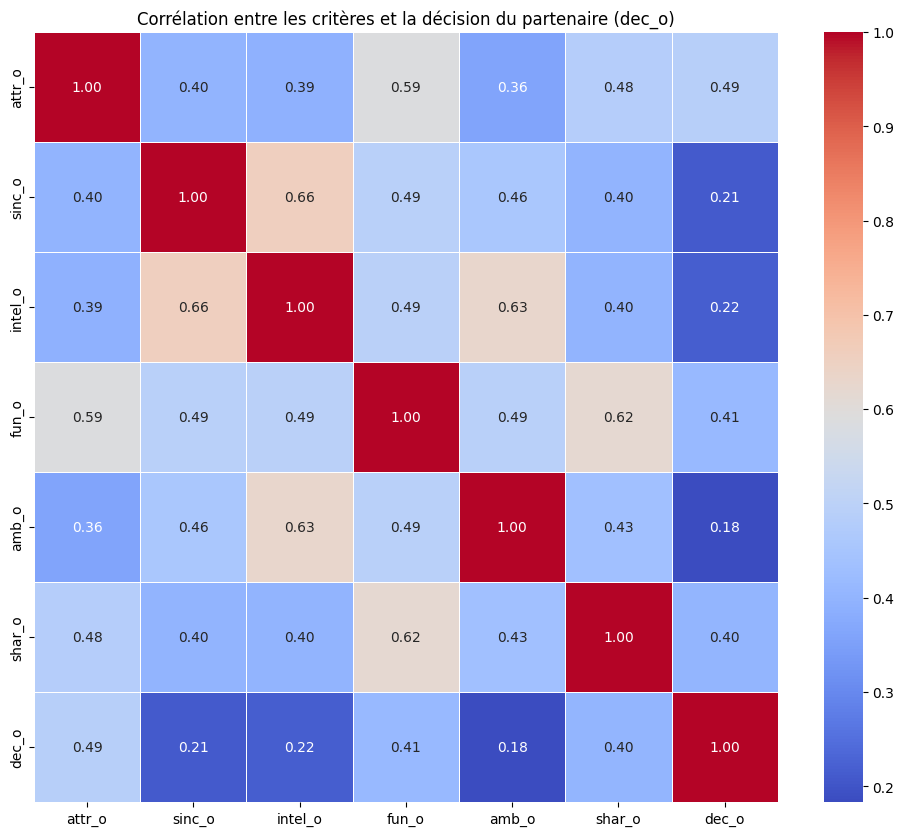

In [49]:
# Sélection des variables influençant directement `dec_o`
cols_decision = ["attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", 
                 "dec_o"]

# Calcul de la corrélation
correlation_decision = df[cols_decision].corr()

# Création de la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_decision, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre les critères et la décision du partenaire (dec_o)")
plt.show()


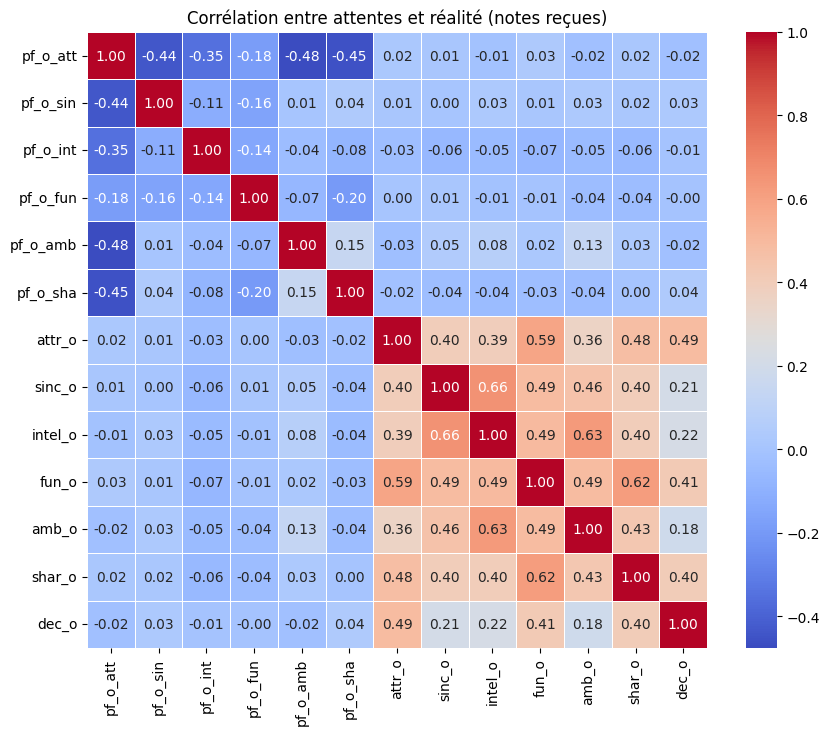

In [54]:
# Sélection des colonnes pour comparer attentes et réalité
cols_expectation_vs_reality = ["pf_o_att", "pf_o_sin", "pf_o_int", "pf_o_fun", "pf_o_amb", "pf_o_sha",
                               "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", "dec_o"]

# Calcul des corrélations
correlation_expectation = df[cols_expectation_vs_reality].corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_expectation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre attentes et réalité (notes reçues)")
plt.show()


➡️ On peut deduire que les impressions à chaud sont plus importantes que les attentes pour choisir de match
### verifions si applicable au genre

In [53]:
df_male = df[df["gender"] == 1]
df_female = df[df["gender"] == 0]

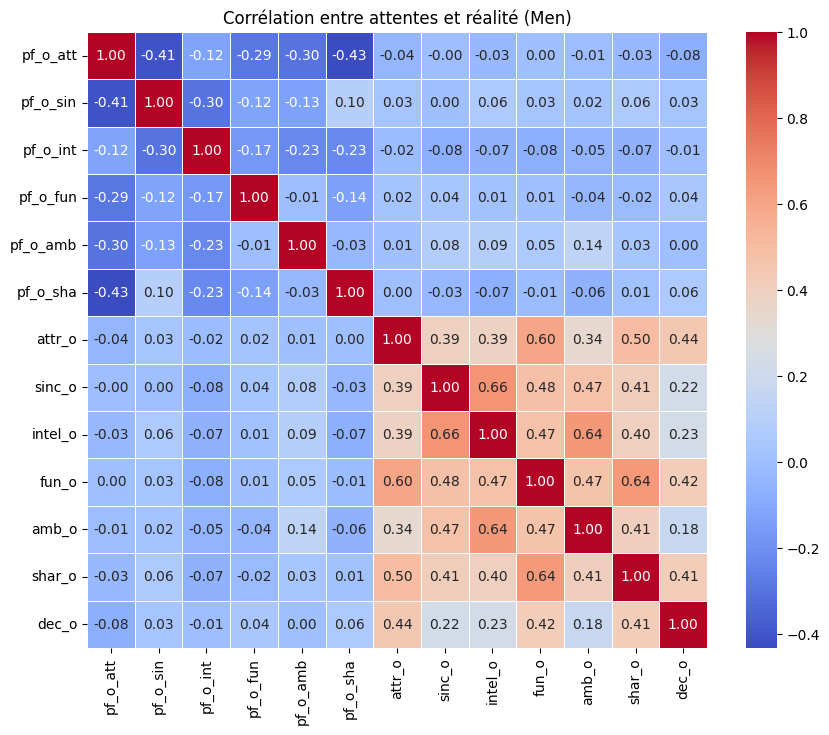

In [55]:
# Sélection des colonnes pour comparer attentes et réalité
cols_expectation_vs_reality = ["pf_o_att", "pf_o_sin", "pf_o_int", "pf_o_fun", "pf_o_amb", "pf_o_sha",
                               "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", "dec_o"]

# Calcul des corrélations
correlation_expectation = df_male[cols_expectation_vs_reality].corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_expectation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre attentes et réalité (Men)")
plt.show()

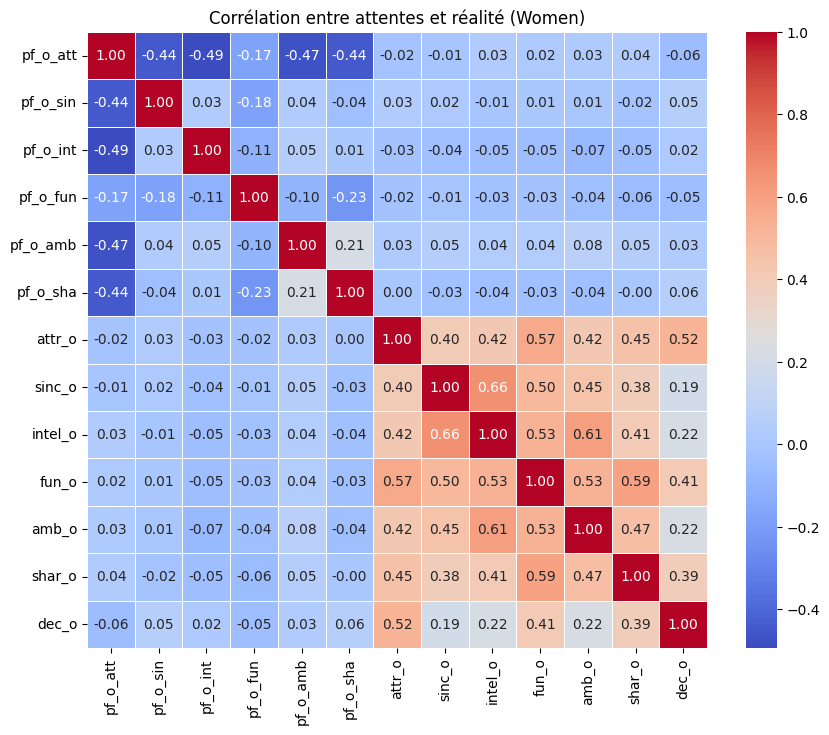

In [57]:
# Sélection des colonnes pour comparer attentes et réalité
cols_expectation_vs_reality = ["pf_o_att", "pf_o_sin", "pf_o_int", "pf_o_fun", "pf_o_amb", "pf_o_sha",
                               "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", "dec_o"]

# Calcul des corrélations
correlation_expectation = df_female[cols_expectation_vs_reality].corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_expectation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre attentes et réalité (Women)")
plt.show()

➡️ Pas de différence notables de comportement

## trait désirable
étudier sur les sujets ayant match

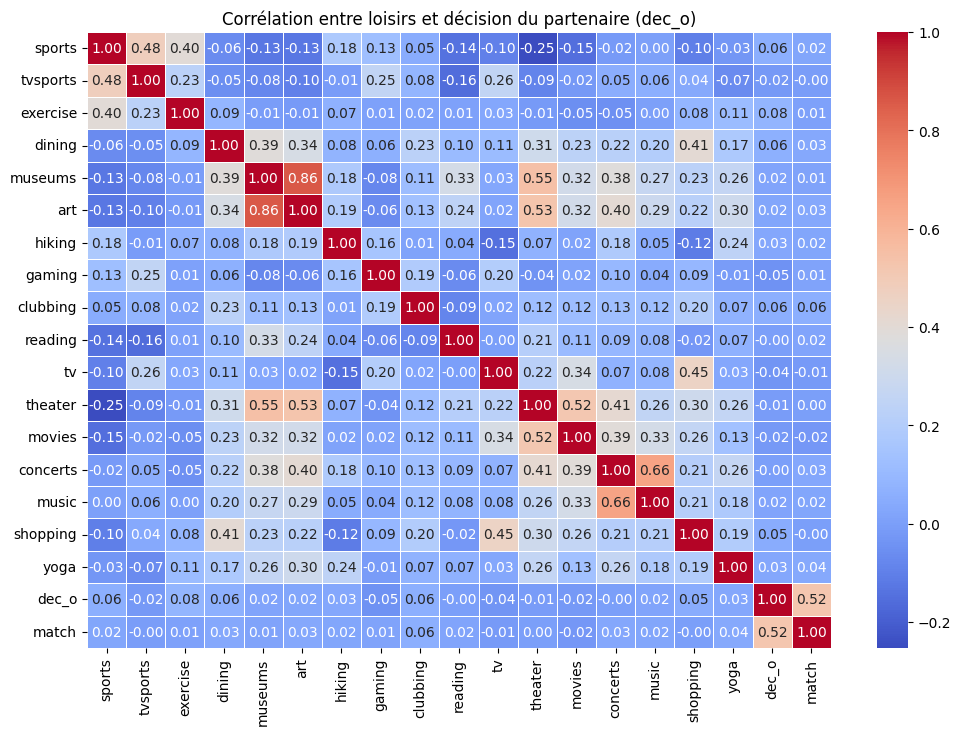

In [62]:
cols_loisirs = ["sports", "tvsports", "exercise", "dining", "museums", "art", 
                "hiking", "gaming", "clubbing", "reading", "tv", "theater", 
                "movies", "concerts", "music", "shopping", "yoga", "dec_o", "match"]

# Calcul de la corrélation
correlation_loisirs = df[cols_loisirs].corr()

# Heatmap des corrélations entre loisirs et décision du partenaire
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_loisirs, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre loisirs et décision du partenaire (dec_o)")
plt.show()


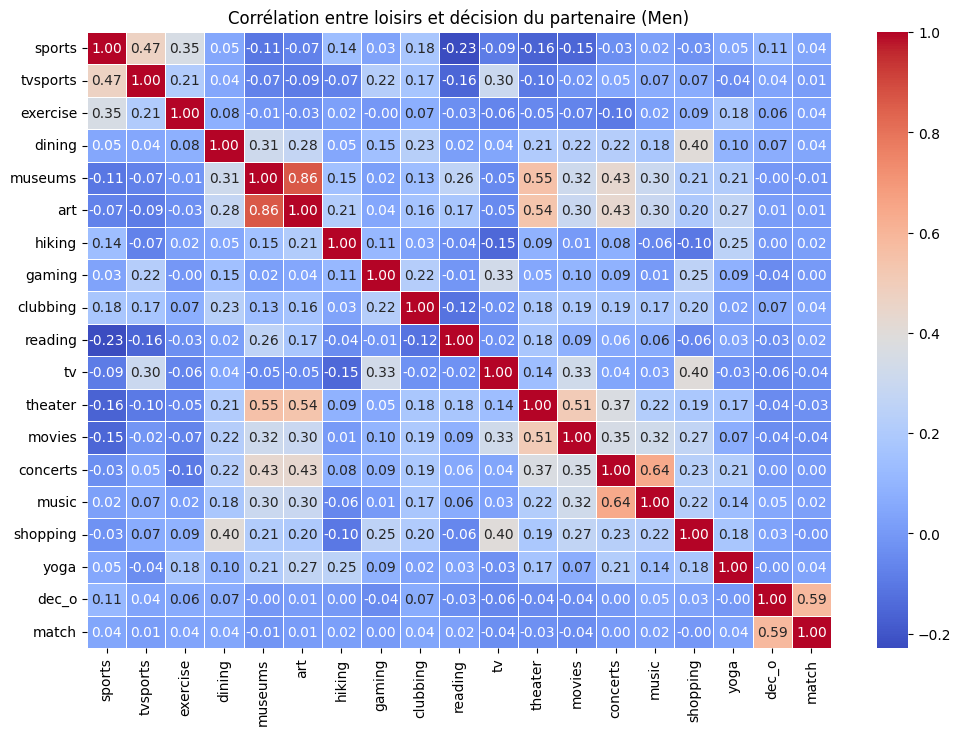

In [63]:
cols_loisirs = ["sports", "tvsports", "exercise", "dining", "museums", "art", 
                "hiking", "gaming", "clubbing", "reading", "tv", "theater", 
                "movies", "concerts", "music", "shopping", "yoga", "dec_o", "match"]

# Calcul de la corrélation
correlation_loisirs = df_male[cols_loisirs].corr()

# Heatmap des corrélations entre loisirs et décision du partenaire
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_loisirs, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre loisirs et décision du partenaire (Men)")
plt.show()


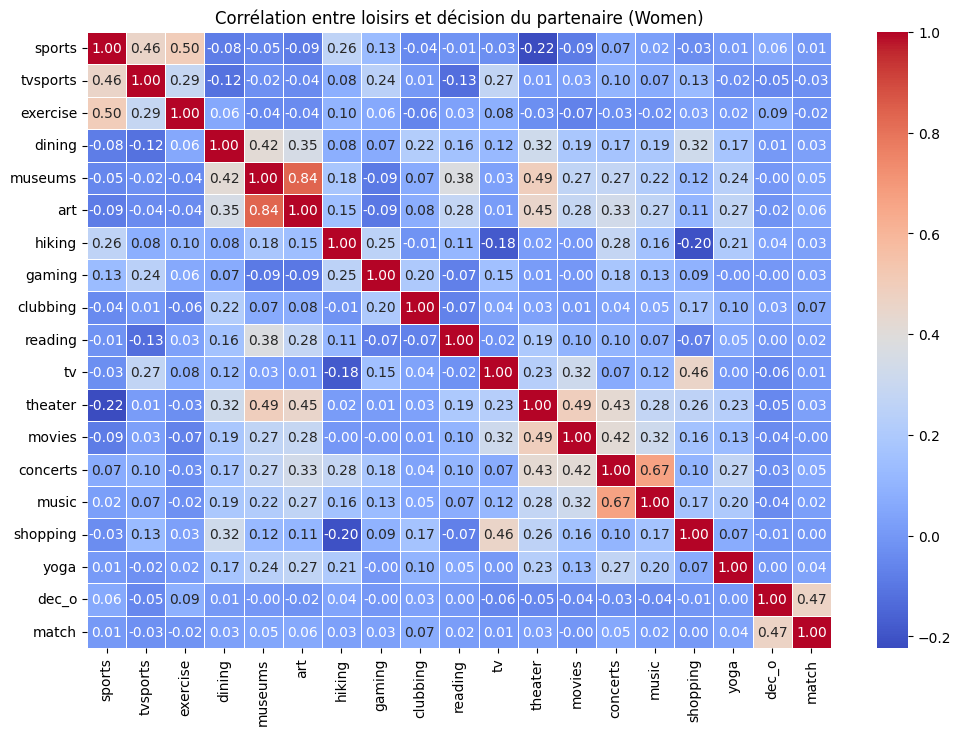

In [86]:
cols_loisirs = ["sports", "tvsports", "exercise", "dining", "museums", "art", 
                "hiking", "gaming", "clubbing", "reading", "tv", "theater", 
                "movies", "concerts", "music", "shopping", "yoga", "dec_o", "match"]

# Calcul de la corrélation
correlation_loisirs = df_female[cols_loisirs].corr()

# Heatmap des corrélations entre loisirs et décision du partenaire
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_loisirs, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre loisirs et décision du partenaire (Women)")
plt.show()


➡️ Aucun loisir ne semble être bloquant pour une decision de revoir le partenaire

## Ordre d'arrivé
### global

In [69]:
df[["gender", "order","dec_o", "match"]]

,gender,order,dec_o,match
0,0,4,0,0
1,0,3,0,0
2,0,10,1,1
3,0,5,1,1
4,0,7,1,1
...,...,...,...,...
8373,1,5,1,0
8374,1,4,0,0
8375,1,10,0,0
8376,1,16,1,0


In [81]:
df_order = df.groupby("order")[["dec_o", "match"]].sum().reset_index()

print(df_order)


    order  dec_o  match
0       1    270    127
1       2    219     88
2       3    225     91
3       4    245     99
4       5    244     97
5       6    234     88
6       7    209     79
7       8    210     79
8       9    228    101
9      10    194     84
10     11    138     61
11     12    154     46
12     13    157     57
13     14    163     54
14     15    137     44
15     16    116     41
16     17     93     29
17     18     95     40
18     19     80     33
19     20     58     26
20     21     29      6
21     22     17     10


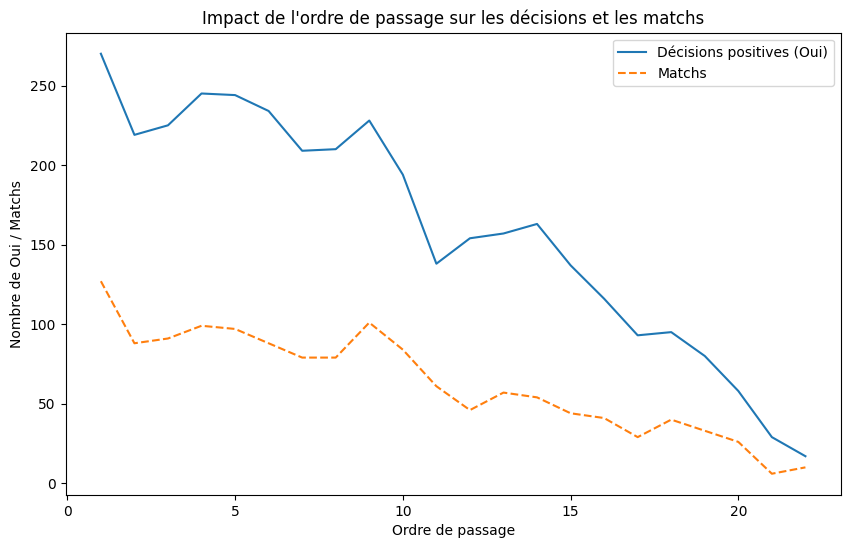

In [72]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_order, x="order", y="dec_o", label="Décisions positives (Oui)")
sns.lineplot(data=df_order, x="order", y="match", label="Matchs", linestyle="dashed")
plt.title("Impact de l'ordre de passage sur les décisions et les matchs")
plt.xlabel("Ordre de passage")
plt.ylabel("Nombre de Oui / Matchs")
plt.legend()
plt.show()


➡️ Au globale, l'ordre d'arrivé conditionne grandement la chance de ne pas être séléctionner pour un match
### Il y a t il une difference par genre?

In [80]:
df_order_female = df_female.groupby("order")[["dec_o", "match"]].sum().reset_index()
df_order_male = df_male.groupby("order")[["dec_o", "match"]].sum().reset_index()

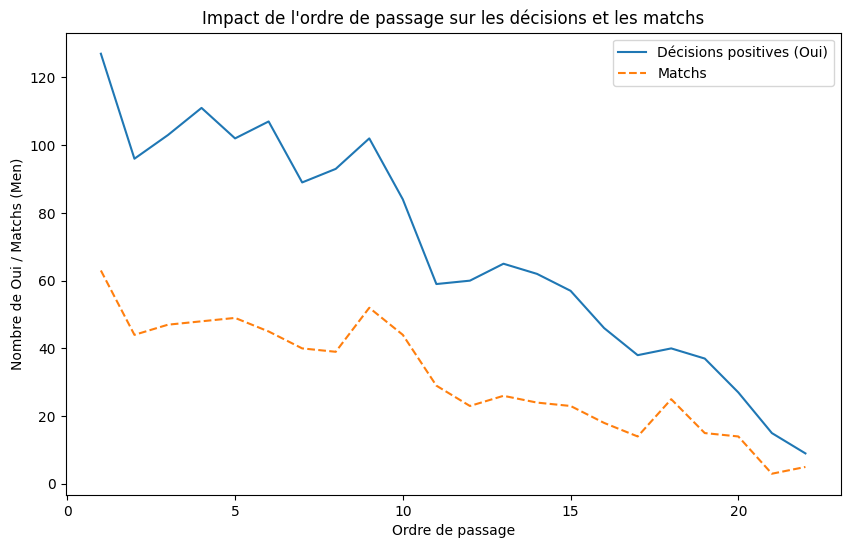

In [82]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_order_male, x="order", y="dec_o", label="Décisions positives (Oui)")
sns.lineplot(data=df_order_male, x="order", y="match", label="Matchs", linestyle="dashed")
plt.title("Impact de l'ordre de passage sur les décisions et les matchs")
plt.xlabel("Ordre de passage")
plt.ylabel("Nombre de Oui / Matchs (Men)")
plt.legend()
plt.show()

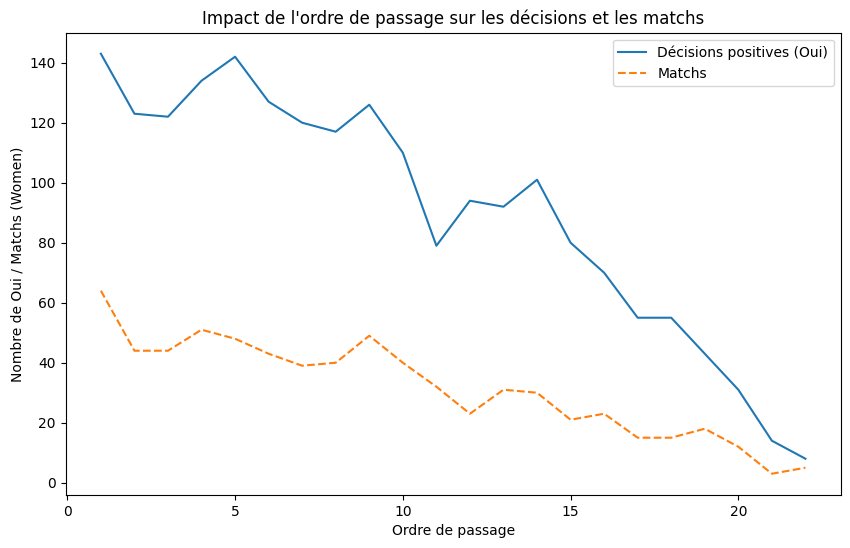

In [83]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_order_female, x="order", y="dec_o", label="Décisions positives (Oui)")
sns.lineplot(data=df_order_female, x="order", y="match", label="Matchs", linestyle="dashed")
plt.title("Impact de l'ordre de passage sur les décisions et les matchs")
plt.xlabel("Ordre de passage")
plt.ylabel("Nombre de Oui / Matchs (Women)")
plt.legend()
plt.show()

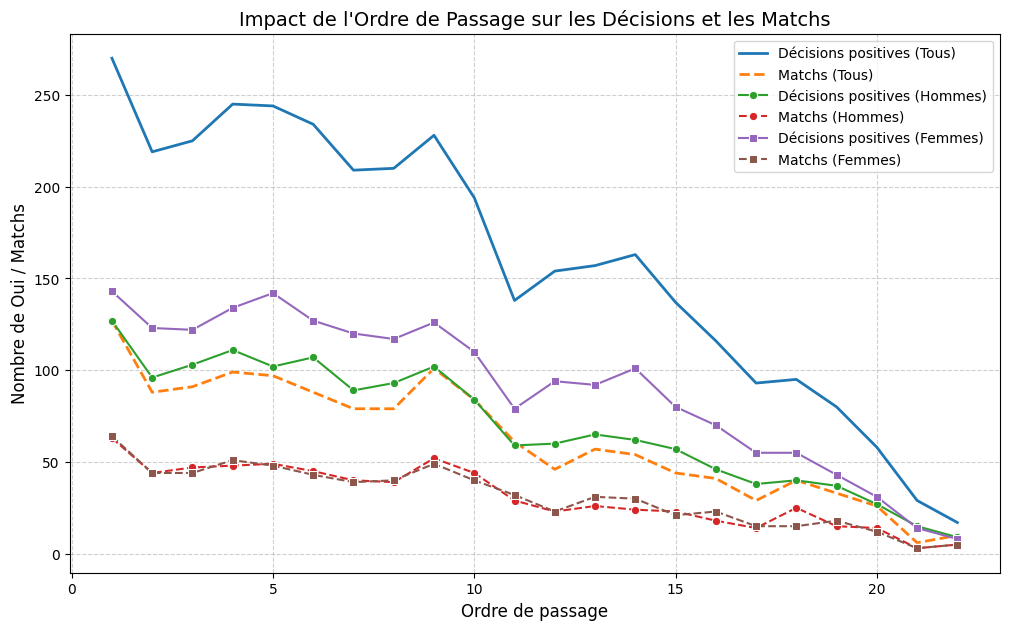

In [84]:
plt.figure(figsize=(12, 7))

# Plot for the overall dataset
sns.lineplot(data=df_order, x="order", y="dec_o", label="Décisions positives (Tous)", linewidth=2)
sns.lineplot(data=df_order, x="order", y="match", label="Matchs (Tous)", linestyle="dashed", linewidth=2)

# Plot for males
sns.lineplot(data=df_order_male, x="order", y="dec_o", label="Décisions positives (Hommes)", linestyle="solid", marker="o")
sns.lineplot(data=df_order_male, x="order", y="match", label="Matchs (Hommes)", linestyle="dashed", marker="o")

# Plot for females
sns.lineplot(data=df_order_female, x="order", y="dec_o", label="Décisions positives (Femmes)", linestyle="solid", marker="s")
sns.lineplot(data=df_order_female, x="order", y="match", label="Matchs (Femmes)", linestyle="dashed", marker="s")

# Customizing the plot
plt.title("Impact de l'Ordre de Passage sur les Décisions et les Matchs", fontsize=14)
plt.xlabel("Ordre de passage", fontsize=12)
plt.ylabel("Nombre de Oui / Matchs", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


➡️ La tendence est confirmée peu importe le genre

C:\Users\vickd\AppData\Local\Temp\ipykernel_20992\42358037.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="order", y="date_3", ci=None)


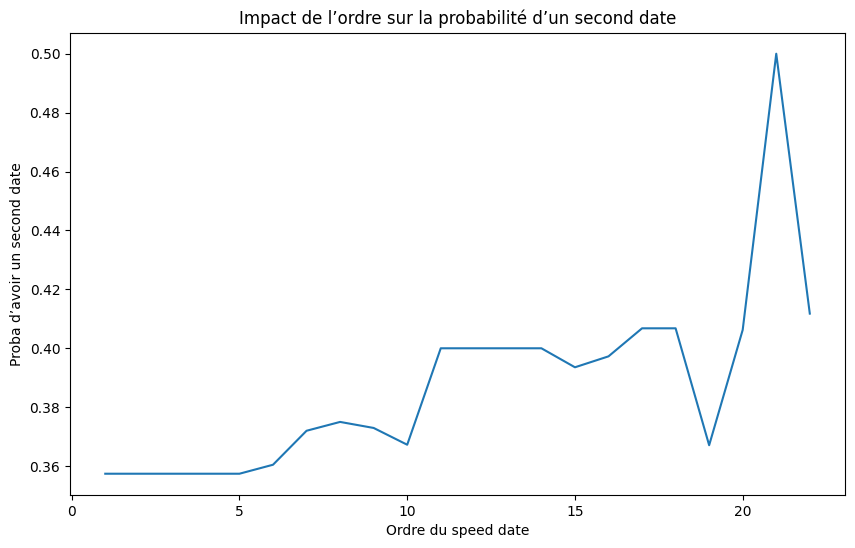

In [87]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="order", y="date_3", ci=None)
plt.title("Impact de l’ordre sur la probabilité d’un second date")
plt.xlabel("Ordre du speed date")
plt.ylabel("Proba d’avoir un second date")
plt.show()


C:\Users\vickd\AppData\Local\Temp\ipykernel_20992\2774083508.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="order", y="date_3", hue="gender", ci=None)


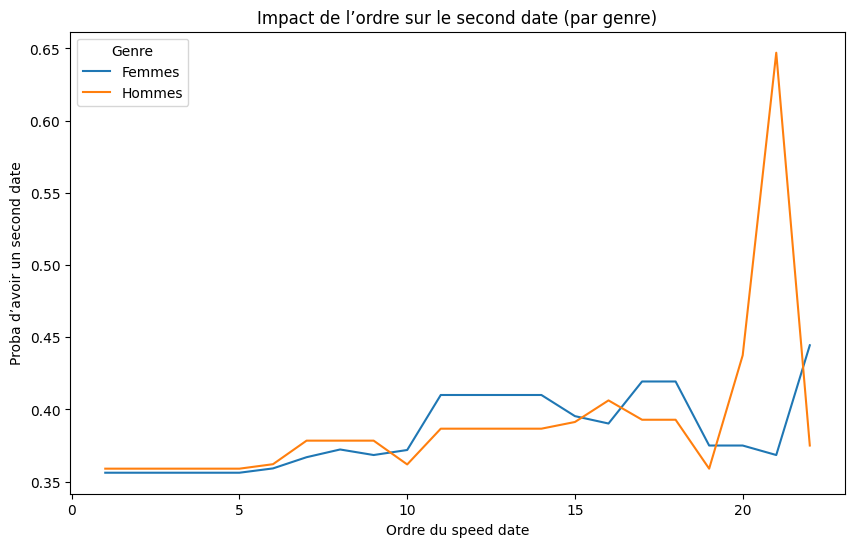

In [88]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="order", y="date_3", hue="gender", ci=None)
plt.title("Impact de l’ordre sur le second date (par genre)")
plt.xlabel("Ordre du speed date")
plt.ylabel("Proba d’avoir un second date")
plt.legend(title="Genre", labels=["Femmes", "Hommes"])
plt.show()


➡️ Arriver à la fin favorise la chance d'avoir un nouveau date pour les Femmes, pour les hommes, être __le__ dernier favorise

## Autoperception Vs Realité

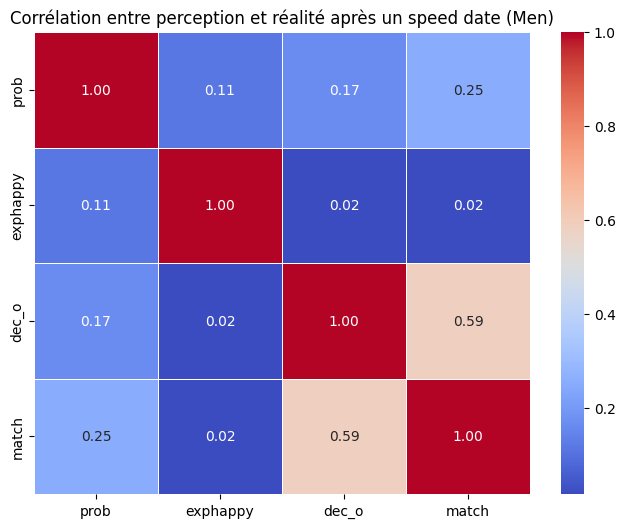

In [94]:
cols_perception_vs_reality = ["prob", "exphappy", "dec_o", "match"]

correlation_perception = df_male[cols_perception_vs_reality].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_perception, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre perception et réalité après un speed date (Men)")
plt.show()


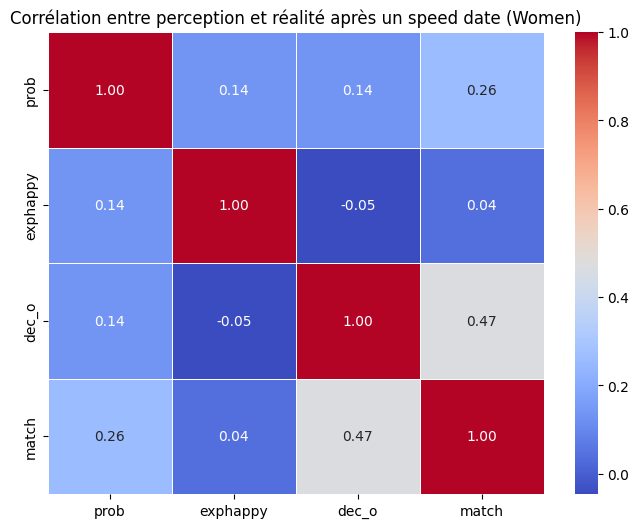

In [93]:
cols_perception_vs_reality = ["prob", "exphappy", "dec_o", "match"]

correlation_perception = df_female[cols_perception_vs_reality].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_perception, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre perception et réalité après un speed date (Women)")
plt.show()

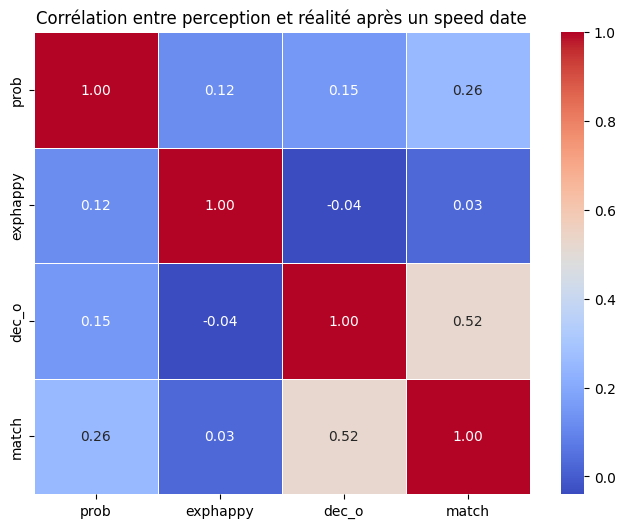

In [92]:
cols_perception_vs_reality = ["prob", "exphappy", "dec_o", "match"]

correlation_perception = df[cols_perception_vs_reality].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_perception, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre perception et réalité après un speed date")
plt.show()

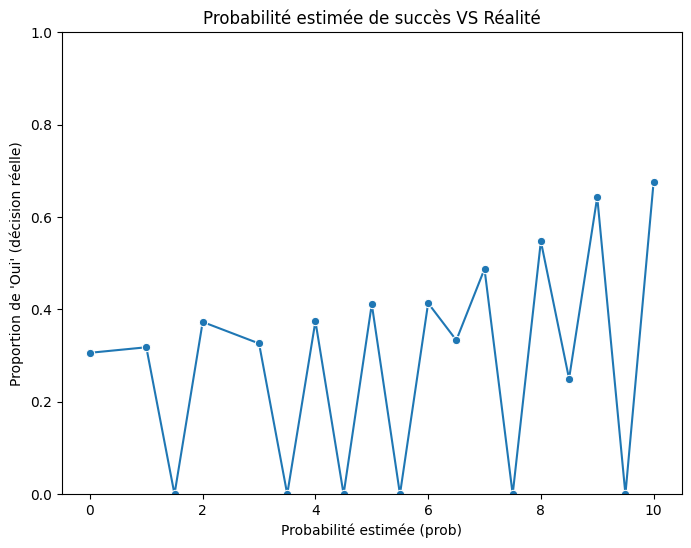

In [98]:
df_prob = df.groupby("prob")["dec_o"].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(data=df_prob, x="prob", y="dec_o", marker="o")
plt.title("Probabilité estimée de succès VS Réalité")
plt.xlabel("Probabilité estimée (prob)")
plt.ylabel("Proportion de 'Oui' (décision réelle)")
plt.ylim(0, 1)  # Pour garder l'échelle entre 0 et 1
plt.show()


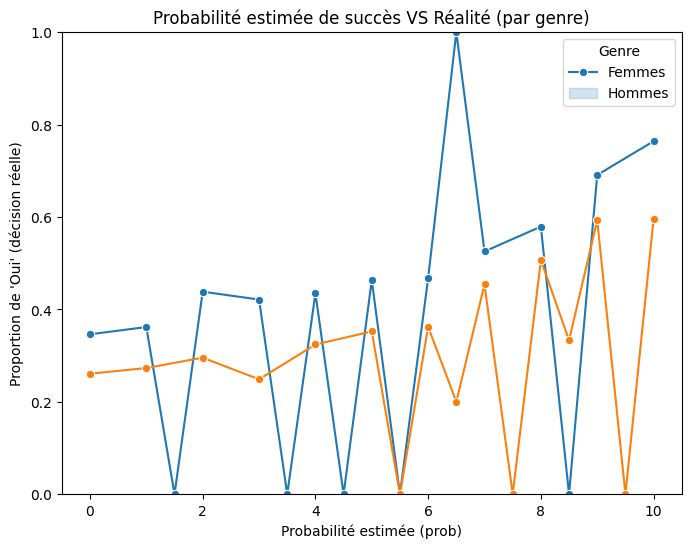

In [100]:
df_prob_gender = df.groupby(["prob", "gender"])["dec_o"].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(data=df_prob_gender, x="prob", y="dec_o", hue="gender", marker="o")
plt.title("Probabilité estimée de succès VS Réalité (par genre)")
plt.xlabel("Probabilité estimée (prob)")
plt.ylabel("Proportion de 'Oui' (décision réelle)")
plt.ylim(0, 1)
plt.legend(title="Genre", labels=["Femmes", "Hommes"])
plt.show()


➡️ Avoir une grande autoperseption permet d'améliorer ses chances de succès de maniere minimes

## Maintiens dans le temps

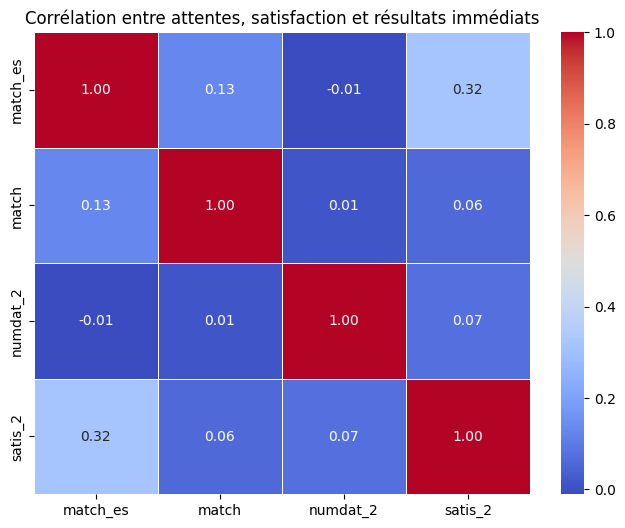

In [101]:
cols_satisfaction = ["match_es", "match", "numdat_2", "satis_2"]

correlation_satisfaction = df[cols_satisfaction].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_satisfaction, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre attentes, satisfaction et résultats immédiats")
plt.show()


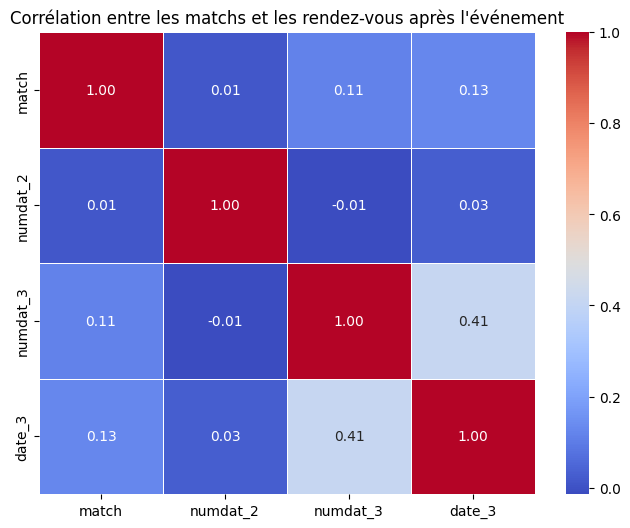

In [ ]:
cols_followup = ["match", "numdat_2", "numdat_3", "date_3"]

correlation_followup = df[cols_followup].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_followup, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre les matchs et les rendez-vous après l'événement")
plt.show()


➡️ La probabilité d’un troisième rendez-vous est fortement influencée par l’existence d’un deuxième.

# 🎯 Conclusion
Nous avons identifié plusieurs facteurs influençant le succès d’un speed date. Parmi eux, l’ordre de passage et les attentes des participants ont un rôle clé. 
Cependant, la majorité des matchs ne se transforment pas en rendez-vous durables. L’expérience globale semble être plus importante que les résultats immédiats.
